<a href="https://colab.research.google.com/github/llaygh/T5_camp_Amany/blob/main/Amany__Week2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [81]:
df = pd.read_csv('RTA_Dataset.csv')

In [82]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [83]:
df.shape

(12316, 32)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [87]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [88]:
columns_to_drop=['Vehicle_driver_relation','Owner_of_vehicle','Service_year_of_vehicle','Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions','Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians',]
df = df.drop(columns=columns_to_drop, axis=1)

In [89]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Light_conditions', 'Weather_conditions', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [90]:
df.shape

(12316, 11)

In [112]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Driving_experience,0
Type_of_vehicle,0
Light_conditions,0
Weather_conditions,0
Cause_of_accident,0


In [92]:
df = df[ df['Educational_level'].str.contains( 'Unknown' )==False ]

In [93]:
df.groupby("Age_band_of_driver", group_keys=True)[['Educational_level']].fillna(df['Educational_level'].mode(), inplace=True)

""


In [94]:
df['Educational_level'].isnull().sum()

0

In [95]:
df['Educational_level'].replace(['Junior high school', 'Elementary school','High school' ,'Above high school','Writing & reading','Illiterate'],
                        [0,1,2,3,4,5], inplace=True)

In [96]:
df['Educational_level'].value_counts()

,count
Educational_level,
0,7619
1,2163
2,1110
3,362
4,176
5,45


In [97]:
#df['Driving_experience'].isnull().sum()
df = df[ df[ 'Driving_experience' ].str.contains( 'unknown' )==False ]
df.groupby("Age_band_of_driver", group_keys=True)[['Driving_experience']].fillna(df['Driving_experience'].mode(), inplace=True)
df['Driving_experience'].replace(['5-10yr', '2-5yr','Above 10yr','1-2yr','Below 1yr' , 'No Licence' ],
                        [0,1,2,3,4,5], inplace=True)

<ipython-input-97-baf84aafae99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driving_experience'].replace(['5-10yr', '2-5yr','Above 10yr','1-2yr','Below 1yr' , 'No Licence' ],


In [98]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
0,3231
1,2599
2,2229
3,1733
4,1280
5,118


In [ ]:
df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,2917
Lorry (41?100Q),2017
Other,1095
Pick up upto 10Q,740
Public (12 seats),654
Stationwagen,608
Lorry (11?40Q),497
Public (13?45 seats),488
Public (> 45 seats),380


In [109]:
df['Type_of_vehicle'].mode()

,Type_of_vehicle
0,Automobile


In [110]:
df['Type_of_vehicle']= df['Type_of_vehicle'].fillna('Automobile')

In [111]:
df['Type_of_vehicle'].isnull().sum()

0

In [142]:
df['Type_of_vehicle']= df['Type_of_vehicle'].astype('category')
df['Type_of_vehicle'] = df['Type_of_vehicle'].cat.codes

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9439 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Time                9439 non-null   datetime64[ns]
 1   Day_of_week         9439 non-null   int64         
 2   Age_band_of_driver  9439 non-null   int64         
 3   Sex_of_driver       9439 non-null   int64         
 4   Educational_level   9439 non-null   int64         
 5   Driving_experience  9439 non-null   int64         
 6   Type_of_vehicle     9439 non-null   int8          
 7   Light_conditions    9439 non-null   int64         
 8   Weather_conditions  9439 non-null   int64         
 9   Cause_of_accident   9439 non-null   object        
 10  Accident_severity   9439 non-null   int64         
dtypes: datetime64[ns](1), int64(8), int8(1), object(1)
memory usage: 820.4+ KB


In [117]:
df['Time']= pd.to_datetime(df['Time'])

<ipython-input-117-9d8a133adb20>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time'])


In [124]:
df['Day_of_week'].replace(['Friday', 'Thursday','Wednesday','Tuesday','Monday' , 'Saturday','Sunday' ],
                        [0,1,2,3,4,5,6], inplace=True)
df['Day_of_week'].value_counts()


,count
Day_of_week,
0,1855
1,1676
2,1651
3,1614
4,1530
5,1522
6,1342


In [127]:
df = df[ df['Age_band_of_driver'].str.contains( 'Unknown' )==False ]

In [132]:
df['Age_band_of_driver'].replace(['18-30', '31-50','Over 51','Under 18'],
                        [0,1,2,3], inplace=True)

<ipython-input-132-6872bb2ddbcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_band_of_driver'].replace(['18-30', '31-50','Over 51','Under 18'],


In [133]:
df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
0,3863
1,3727
2,1434
3,752


In [137]:
df = df[ df['Sex_of_driver'].str.contains( 'Unknown' )==False ]
df['Sex_of_driver'].replace(['Male', 'Female'],
                        [0,1], inplace=True)

df['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
0,9506
1,120


In [148]:
df['Accident_severity'].replace(['Slight Injury', 'Serious Injury','Fatal injury'],
                        [0,1,2], inplace=True)
df['Accident_severity'].value_counts()

,count
Accident_severity,
0,8088
1,1404
2,134


In [150]:
df['Light_conditions'].replace(['Daylight', 'Darkness - lights lit','Darkness - no lighting' ,'Darkness - lights unlit'],
                        [0,1,2,3], inplace=True)
df['Light_conditions'].value_counts()

,count
Light_conditions,
0,6921
1,2518
2,156
3,31


In [153]:
df = df[ df['Weather_conditions'].str.contains( 'Unknown' )==False ]
df['Weather_conditions'].replace(['Normal', 'Raining','Other' ,'Cloudy','Windy','Snow','Raining and Windy','Fog or mist'],
                        [0,1,2,3,4,5,6,7], inplace=True)
df['Weather_conditions'].value_counts()

,count
Weather_conditions,
0,7880
1,1069
2,223
3,98
4,79
5,51
6,31
7,8


In [156]:
df = df[ df['Cause_of_accident'].str.contains( 'Unknown' )==False ]
df['Cause_of_accident']= df['Cause_of_accident'].astype('category')
df['Cause_of_accident'] = df['Cause_of_accident'].cat.codes
df['Cause_of_accident'].value_counts()

<ipython-input-156-4d79eefce973>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cause_of_accident']= df['Cause_of_accident'].astype('category')
<ipython-input-156-4d79eefce973>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cause_of_accident'] = df['Cause_of_accident'].cat.codes


,count
Cause_of_accident,
10,1709
1,1386
0,1120
3,1091
12,928
9,876
11,558
13,347
16,328


In [169]:
df.shape

(9421, 11)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

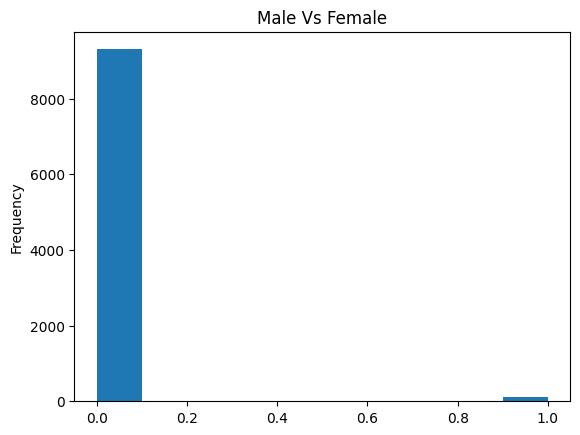

In [159]:
plot = df['Sex_of_driver'].plot(kind='hist', title="Male Vs Female")

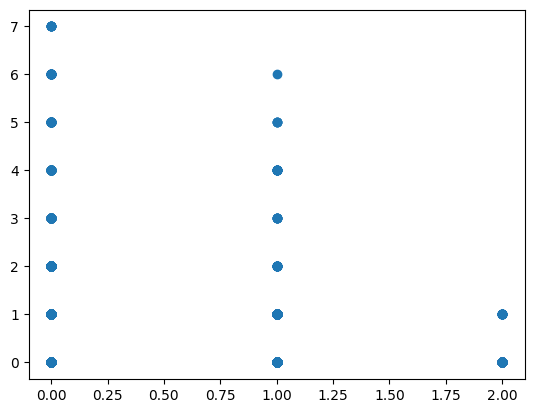

In [189]:
plt.scatter(df['Accident_severity'],df['Weather_conditions'])
plt.show()

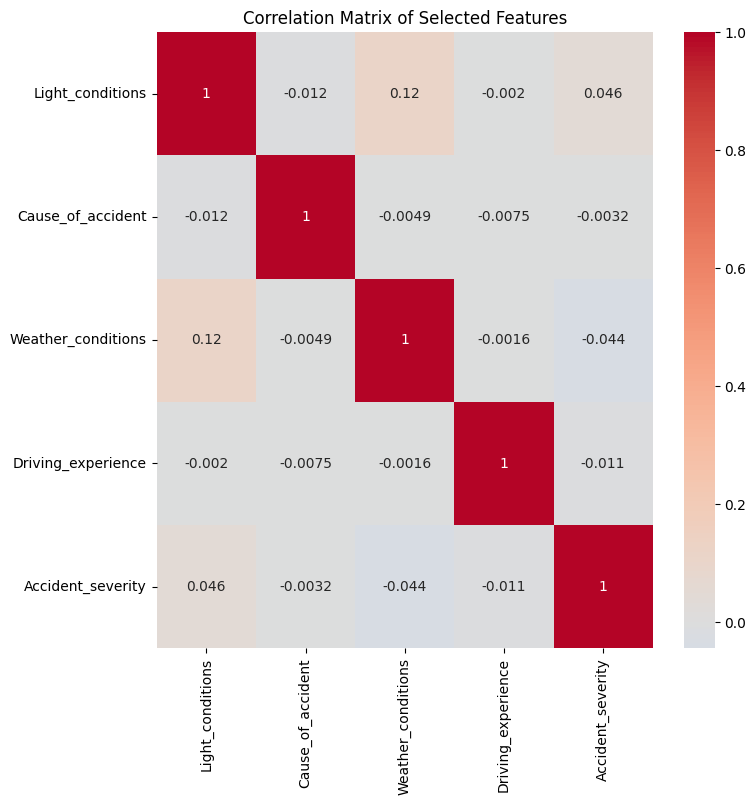

In [186]:
corr_matrix = df.corr()

selected_columns = ['Light_conditions', 'Cause_of_accident', 'Weather_conditions', 'Driving_experience', 'Accident_severity']
selected_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

plt.figure(figsize=(8, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

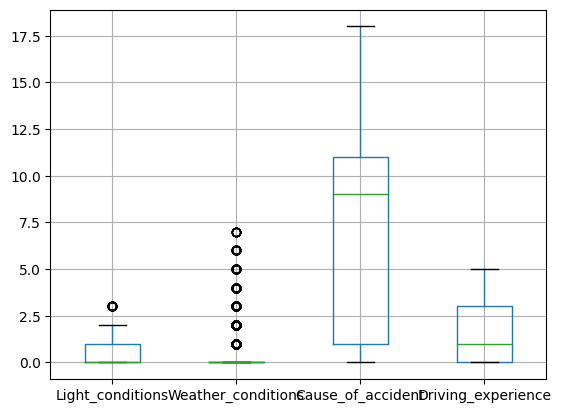

In [187]:

boxplot = df.boxplot(column=['Light_conditions', 'Weather_conditions', 'Cause_of_accident', 'Driving_experience'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Weather_conditions'>

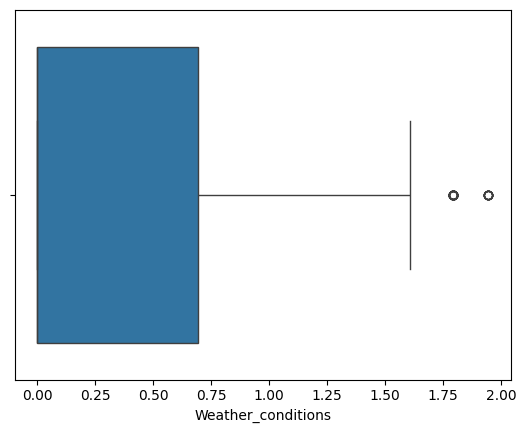

In [188]:
df_log = np.log(df['Weather_conditions'])
sns.boxplot(x=df_log )

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [165]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Light_conditions', 'Weather_conditions', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [170]:
# spliting the data
from sklearn.model_selection import train_test_split
X = df[[ 'Age_band_of_driver', 'Sex_of_driver',
        'Type_of_vehicle', 'Cause_of_accident',
       'Light_conditions', 'Weather_conditions']]
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [173]:
 # Import LinearRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train )

log_reg.predict(X_train)
log_reg.predict(X_test)


print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))


0.8425841674249318
0.8369296073576229


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()

cross_val_score(DT_clf, X, y , cv=10)

array([0.81866384, 0.81847134, 0.81953291, 0.82165605, 0.81210191,
       0.81847134, 0.81953291, 0.81847134, 0.81528662, 0.80467091])

#### Support Vector Machine (SVM)

In [180]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
print(clf.predict(X_train))
print(clf.predict(X_test))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
0.843342432514407
0.8379908029713478


#### K-Neighbors Classifier

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X, y)

print(knn_clf.predict(X_train))
print(knn_clf.predict(X_test))

print(knn_clf.score(X,y))

[0 0 0 ... 0 0 1]
[1 0 0 ... 0 0 0]
0.8262392527332555


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_reg.predict(X_test))

array([[2366,    0,    0],
       [ 424,    0,    0],
       [  37,    0,    0]])

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
- in data visulaizatio i found an outlaeir in weather_condition and ligh_condition which i think that they are importent for the prediction. so i traied to fix it by log trnsformer -> it deacreses

- Both SVM  and logistic Regression are good the give the best accuracy.

- for future improvment i think i should visuliza the model running to learning rate and understand the numbers .